# This script demonstrates Best,Foward,Backward selection 

# and Ridge Regression and Lasso Regression

# Name : Eun-Yeong Jeon

# Student ID : 20153334

# github: https://github.com/Eun0/TIL/new/master/Data%20Mining/assignment01.ipynb

# Outline:

1. Best subset selection


2. Foward stepwise selection


3. Ridge regression


4. Lasso regression

# Import required library :

In [1]:
library(leaps)
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



# Make train and test data :

In [2]:
set.seed(19875)

n=100
p=22
x=matrix(rnorm(n*p),nrow=n,ncol=p)
beta=sample(c(1,0),p,replace = TRUE)
y =x%*% beta+ rnorm(n)

trainrows=sample(1:n,.66*n)

x.train=x[trainrows,]
x.test=x[-trainrows,]


y.train=y[trainrows]
y.test=y[-trainrows]

train_data=data.frame(y=y.train,x.train)

# Show first five data of train_data :

In [3]:
head(train_data,n=5)

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
6.7589608,0.27686593,2.1527015,0.9016671,1.642425510,1.1380635,-0.9292370,-1.3917707,2.1127812,1.9303548,...,0.7642922,-0.22714429,-0.2310872,-1.7719277,1.7460268,0.6689660,-0.1719376,-0.7319904,0.0671127,0.03994955
0.5358185,0.08429508,0.3791939,-0.3762082,-0.165133868,1.1590917,-0.1984965,1.0876483,1.6251798,-0.8456354,...,0.3770395,0.07640236,-0.4321575,0.8033592,0.3286185,1.0639561,0.4822606,-0.6413071,-0.7372751,0.70234135
-5.3854770,-1.81105552,-0.7400497,1.8258816,0.283939470,-0.4411229,0.5132469,0.7075945,-2.4950465,-2.0521814,...,0.4106650,-0.43459950,0.6879516,0.6173523,-2.1039401,1.0402649,-0.8021746,-0.3701931,1.7976792,1.08106029
3.2217462,0.36106887,-1.2878836,-1.0234442,-0.489768611,-0.7080904,0.8947698,-1.5553936,1.1159103,1.4807214,...,-1.0514958,-1.18981215,-1.2532719,0.6977616,0.4855844,0.8542109,-0.5862198,-0.8601755,1.0038794,-0.03009767
-3.0577015,-0.92045927,-1.0824394,-2.4269299,-0.008390868,-1.5586104,-0.9419848,0.4035273,0.9353452,-0.1494265,...,-0.3038304,0.86363407,-1.1698935,0.4798577,-0.2335926,1.3993006,0.5037702,-1.6123314,2.1438346,0.31016132


# check na:

if the number of na is 0, the no need to manipulate data

In [4]:
sum(is.nan(as.matrix(train_data)))

[1] 0

# 1. Best subset selection with train_data

In [5]:
# nvmax= max number of predictors to choose
regfit.full=regsubsets(y~., train_data, nvmax=22)

# Show summary:

In [6]:
reg_summary=summary(regfit.full)
reg_summary

Subset selection object
Call: regsubsets.formula(y ~ ., train_data, nvmax = 22)
22 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
X21     FALSE      FALSE
X22     FALSE      FALSE
1 subsets of each size up to 22
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*"
2  ( 1 )  " " " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " "*"
3  ( 1 )  " " " "

# Example) choose 7 predictors by best selection :

In [7]:
coef(regfit.full, 7)

(Intercept)          X1          X9         X12         X13         X15 
  0.2872119   0.9046748   1.0711854   0.7240820   0.6437729   0.9459352 
        X17         X18 
  1.1485771   0.8805956

# Plot performance :

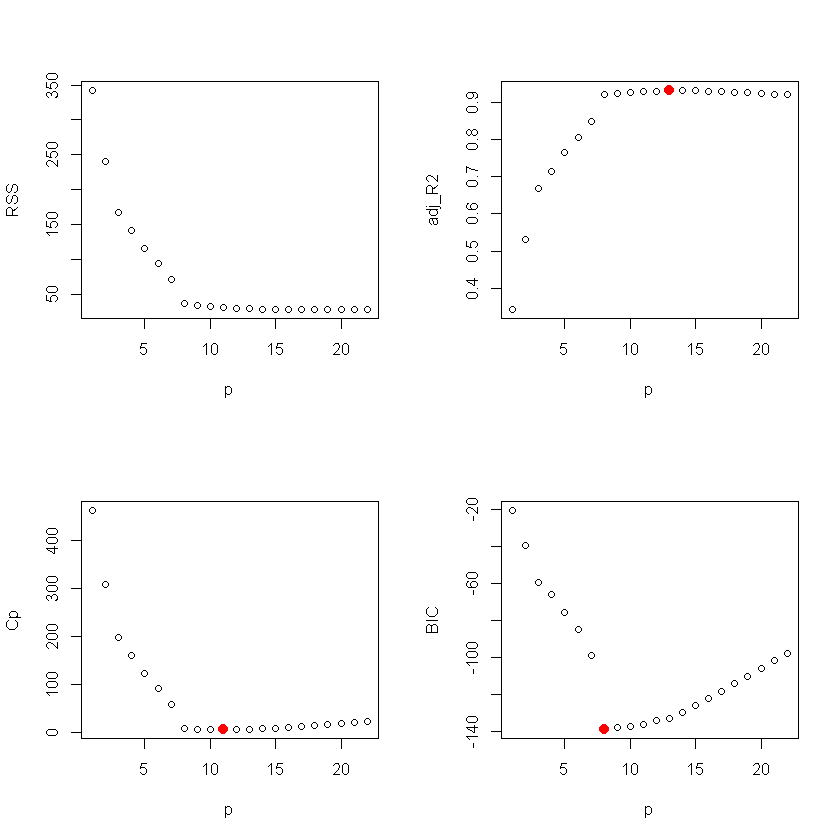

In [8]:
par(mfrow=c(2,2))

plot(reg_summary$rss, ylab='RSS', xlab='p')
plot(reg_summary$adjr2,  ylab='adj_R2', xlab='p')
max_index=which.max(reg_summary$adjr2)
points(max_index, reg_summary$adjr2[max_index], col=2, cex=2, pch=20)

plot(reg_summary$cp,  ylab='Cp', xlab='p')
min_index= which.min(reg_summary$cp)
points(min_index, reg_summary$cp[min_index], col=2, cex=2, pch=20)

plot(reg_summary$bic,  ylab='BIC', xlab='p')
min_index=which.min(reg_summary$bic)
points(min_index, reg_summary$bic[min_index], col=2, cex=2, pch=20)

# Compute test error for each iteration :

In [9]:
test_m=model.matrix(y~.,train_data)

test_errors=vector("double",length=22)

for(i in 1:22){
  
  coefi=coef(regfit.full,i)
  pred=sum(test_m[,names(coefi)]%*%coefi)
  test_errors[i]=mean((y.test-pred)^2)/44
}

# Plot the test error and Point where is minizie it :

Warning message in plot.window(...):
"relative range of values =   0 * EPS, is small (axis 2)"

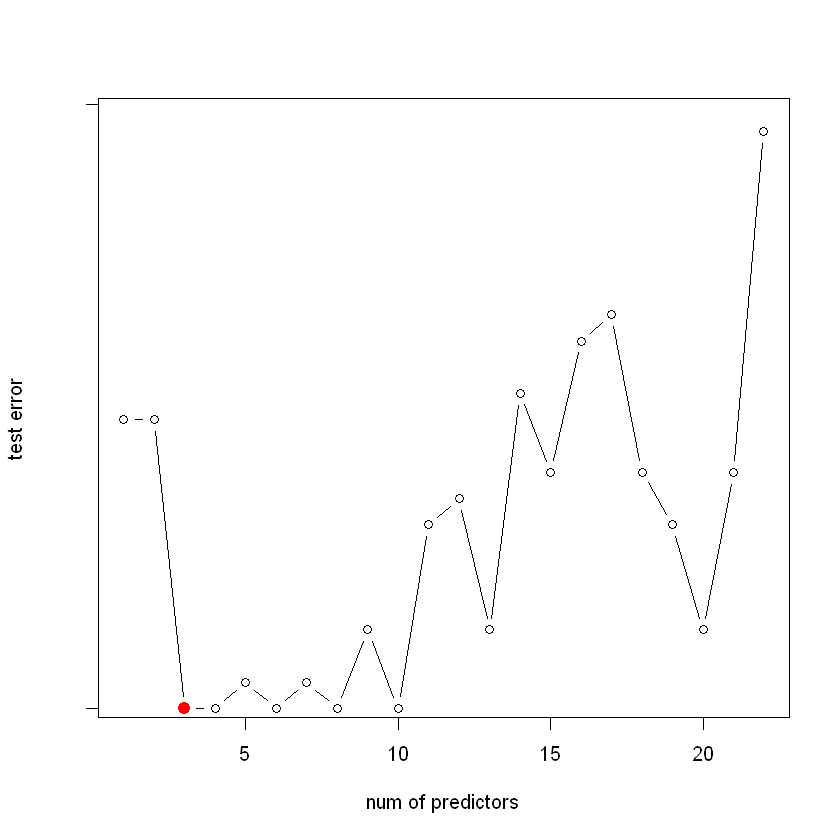

In [10]:
plot(test_errors,ylab='test error',xlab='num of predictors',type='b')
min_index=which.min(test_errors)
points(min_index, test_errors[min_index],col=2,cex=2,pch=20)

# 2. Foward stepwise selection with train_data

In [11]:
regfit.fwd=regsubsets(y~., train_data, nvmax=22, method='forward')

# Show summary:

In [12]:
reg_summary=summary(regfit.fwd)  
reg_summary

Subset selection object
Call: regsubsets.formula(y ~ ., train_data, nvmax = 22, method = "forward")
22 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
X21     FALSE      FALSE
X22     FALSE      FALSE
1 subsets of each size up to 22
Selection Algorithm: forward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*"
2  ( 1 )  " " " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " "*"


# Example) choose 7 predictors by best selection :

In [13]:
coef(regfit.fwd, 7)

(Intercept)          X1          X9         X12         X13         X15 
  0.2872119   0.9046748   1.0711854   0.7240820   0.6437729   0.9459352 
        X17         X18 
  1.1485771   0.8805956

# Plot performance :

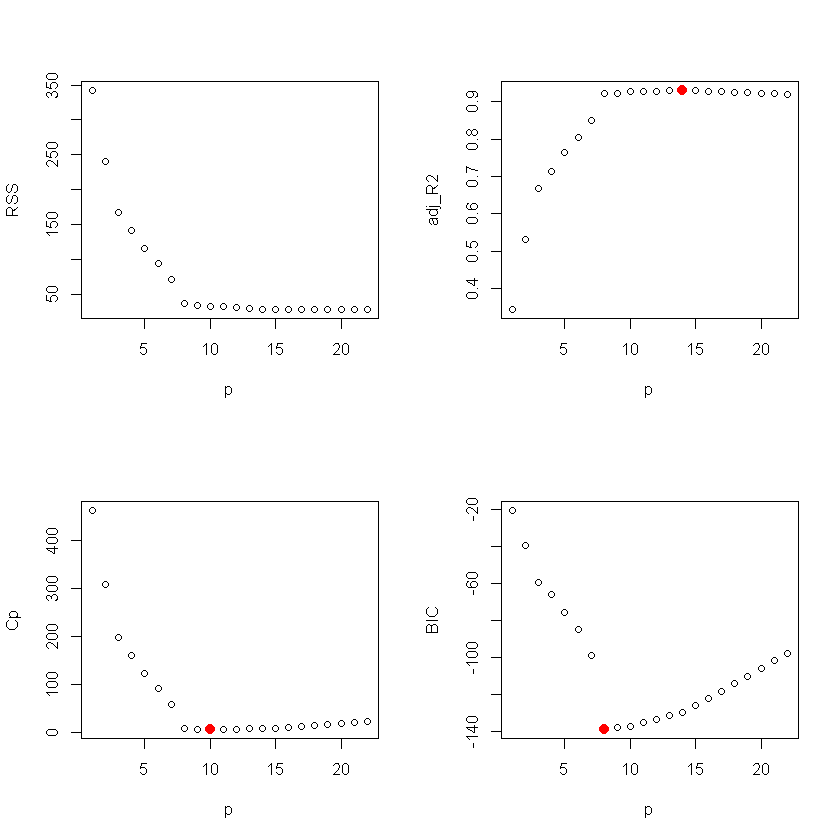

In [14]:
par(mfrow=c(2,2))

plot(reg_summary$rss, ylab='RSS', xlab='p')
plot(reg_summary$adjr2,  ylab='adj_R2', xlab='p')
max_index=which.max(reg_summary$adjr2)
points(max_index, reg_summary$adjr2[max_index], col=2, cex=2, pch=20)

plot(reg_summary$cp,  ylab='Cp', xlab='p')
min_index= which.min(reg_summary$cp)
points(min_index, reg_summary$cp[min_index], col=2, cex=2, pch=20)

plot(reg_summary$bic,  ylab='BIC', xlab='p')
min_index=which.min(reg_summary$bic)
points(min_index, reg_summary$bic[min_index], col=2, cex=2, pch=20)


# Compute test error for each iteration :

In [15]:
test_m=model.matrix(y~.,train_data)

test_errors=vector("double",length=22)

for(i in 1:22){
  
  coefi=coef(regfit.fwd,i)
  # print(coefi,test_m[,names(coefi)]%*%coefi)  
  pred=sum(test_m[,names(coefi)]%*%coefi)

  test_errors[i]=mean((y.test-pred)^2)/44
}

# Plot the test error and Point where is minizie it :

Warning message in plot.window(...):
"relative range of values =   0 * EPS, is small (axis 2)"

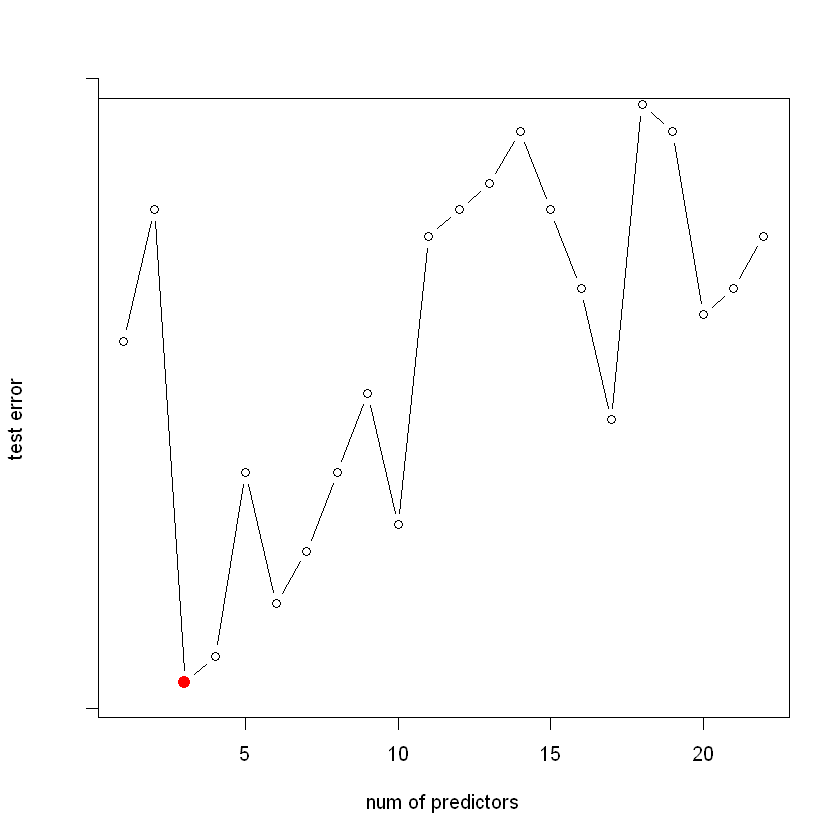

In [16]:
plot(test_errors,ylab='test error',xlab='num of predictors',type='b')
min_index=which.min(test_errors)
points(min_index, test_errors[min_index],col=2,cex=2,pch=20)

# 3. Ridge regression

# Train model by ridge regression :

In [17]:
y=train_data$y
x=model.matrix(y~., train_data )[,-1]

# alpha==0 => ridge regression
ridge.mod=glmnet(x,y, alpha=0) 

# Plot model with varying lambda :

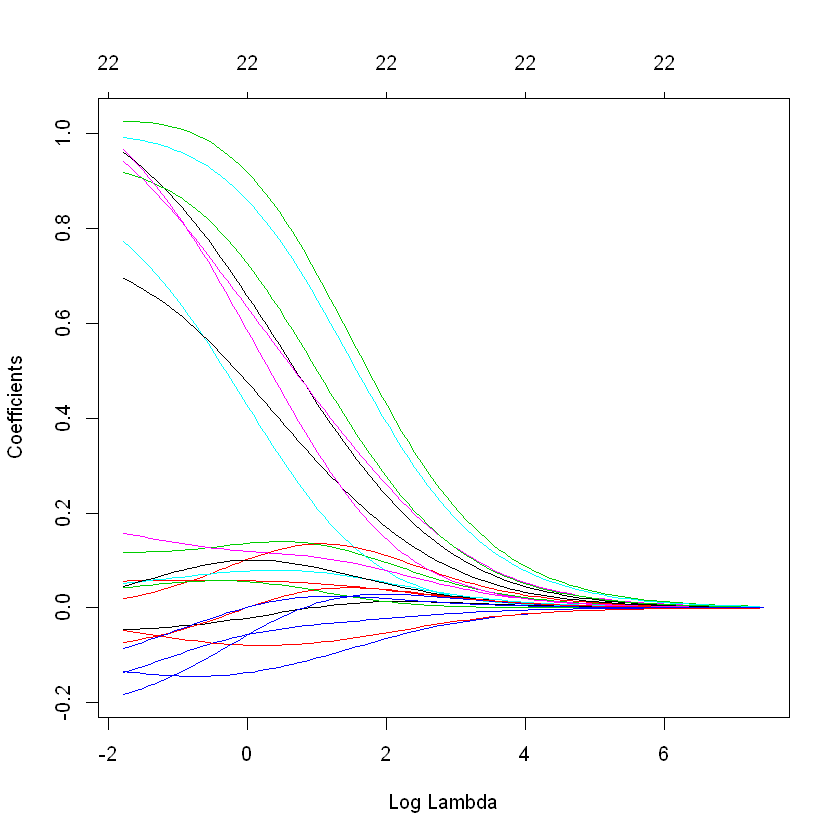

In [18]:
# plot model varying lambda
plot(ridge.mod, xvar='lambda')

# Compute test error :

In [19]:
best_lam=ridge.mod$lambda.min

yhat=predict(ridge.mod,s=best_lam,newx=x.test)

test_error=mean((yhat-y.test)^2)/44
test_error

[1] 0.09828891

# 4. Lasso regression

# Train model by lasso regression :

In [20]:
y=train_data$y
x=model.matrix(y~., train_data )[,-1]

# alpha==1 => lasso regression
lasso.mod=glmnet(x,y,alpha = 1)

# Plot model with varying lambda :

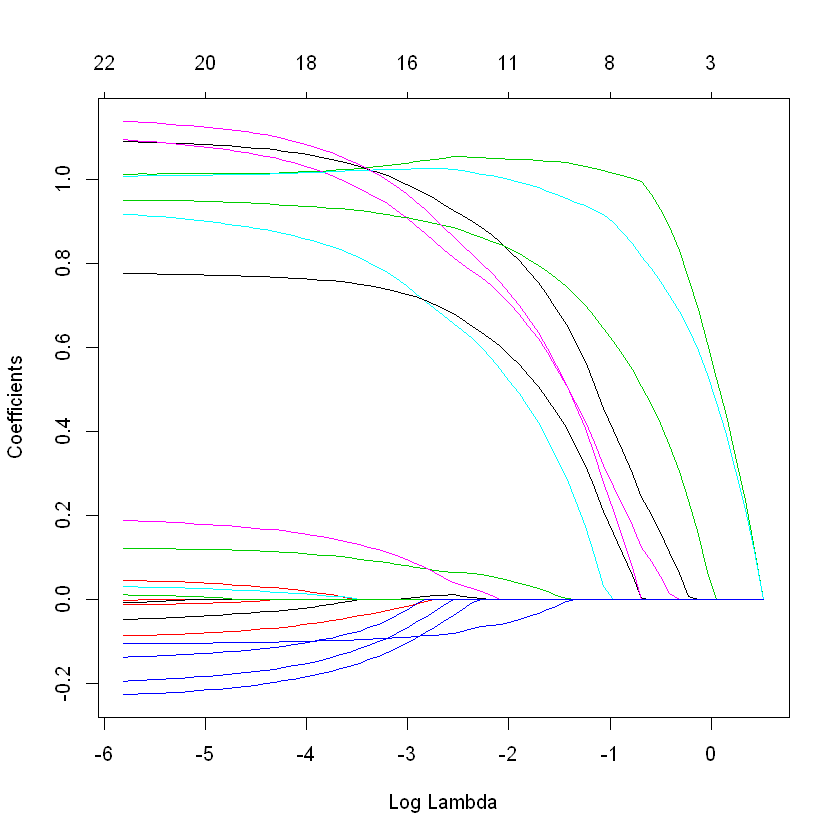

In [21]:
plot(lasso.mod,xvar='lambda')

# Compute test error :

In [22]:
best_lam=lasso.mod$lambda.min

yhat=predict(lasso.mod,s=best_lam,newx=x.test)

test_error=mean((yhat-y.test)^2)/44
test_error

[1] 0.04961487